In [1]:
import requests
import json
import csv
import pandas as pd

response = requests.get('https://api.weather.gov/gridpoints/TOP/31,80/forecast')
data = response.json()
periods = data['properties']['periods']

with open('weather_forecast.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    #name is also day
    writer.writerow(['Name', 'Temperature', 'Detailed Forecast'])

    for i in periods:
        writer.writerow([i['name'], i['temperature'], i['detailedForecast']])
        


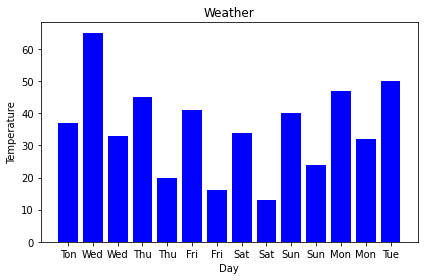

In [36]:
import matplotlib.pyplot as plt

names = []
temperatures = []

for i in periods:
    names.append(i['name'])
    temperatures.append(i['temperature'])

#bonus weather graph does not crowd each other, use first three letters of day names as labels
space = range(len(periods))
labels = [name[:3] for name in names]

plt.bar(space, temperatures, color='blue')
plt.title('Weather')
plt.xlabel('Day')
plt.ylabel('Temperature')

#source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(space, labels)  #tick space and labels
plt.tight_layout()  #adjust space to stop overlapping

plt.show()

In [2]:
#requests is used to make HTTP request from the website
#json is used to analyze JSON data returned by API 
#The requests module is used to make HTTP requests, while the json module is used to parse the JSON data returned by the API into a Python dictionary
import requests
import json

countryCode = "US"

#requests.get() method is then called with different URL as its argument to send the HTTP request to the API
#After getting the HTTP from the API, json() method is called then converts the response data from JSON

#get info for specific country, in this case it's "US"
genius = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")
json_file = genius.json()
json_file

#get all available countries
genius2 = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
json_file2 = genius2.json()
json_file2

#get long weekend for specific country
genius3 = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{2023}/{countryCode}")
json_file3 = genius3.json()
json_file3

#get country's public holidays
genius4 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{2023}/{countryCode}")
json_file4 = genius4.json()
json_file4

#show if today is a public holiday
genius5 = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}")
genius5

#get next public holiday
genius6 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}")
json_file6 = genius6.json()
json_file6

#get upcoming public holiday in world 
genius7 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
json_file7 = genius7.json()
json_file7


[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [39]:
import requests

country_codes = ["US", "AU", "NZ", "FR", "IT", "JP", "BE", "CA", "DK", "CH"]

total = 0

for i in country_codes:
    response = requests.get(f"https://date.nager.at/api/v3/publicholidays/2023/{i}")
    holidays = response.json()
    num_holidays = len(holidays)
    
    total += num_holidays
    
    print(f"{i}: {num_holidays} holidays")
    for holiday in holidays:
        print(f"- {holiday['date']}: {holiday['name']}")

#total holidays
print(f"Total: {total}")



US: 13 holidays
- 2023-01-02: New Year's Day
- 2023-01-16: Martin Luther King, Jr. Day
- 2023-02-20: Washington's Birthday
- 2023-04-07: Good Friday
- 2023-04-07: Good Friday
- 2023-05-29: Memorial Day
- 2023-06-19: Juneteenth
- 2023-07-04: Independence Day
- 2023-09-04: Labour Day
- 2023-10-09: Columbus Day
- 2023-11-10: Veterans Day
- 2023-11-23: Thanksgiving Day
- 2023-12-25: Christmas Day
AU: 21 holidays
- 2023-01-01: New Year's Day
- 2023-01-26: Australia Day
- 2023-03-06: Labour Day
- 2023-03-13: Canberra Day
- 2023-03-13: March Public Holiday
- 2023-03-13: Eight Hours Day
- 2023-03-13: Labour Day
- 2023-04-07: Good Friday
- 2023-04-08: Holy Saturday
- 2023-04-09: Easter Sunday
- 2023-04-10: Easter Monday
- 2023-04-25: Anzac Day
- 2023-05-01: May Day
- 2023-05-01: Labour Day
- 2023-05-29: Reconciliation Day
- 2023-06-05: Western Australia Day
- 2023-06-12: Queen's Birthday
- 2023-08-07: Picnic Day
- 2023-10-02: Labour Day
- 2023-12-25: Christmas Day
- 2023-12-26: St. Stephen's Da

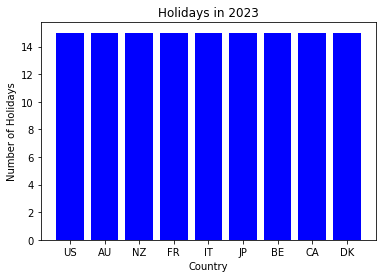

In [40]:
#bonus
import matplotlib.pyplot as plt

plt.bar(country_codes, num_holidays, color='blue')
plt.title('Holidays in 2023')
plt.xlabel('Country')
plt.ylabel('Number of Holidays')
plt.show()


